![NYC Skyline](nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

In [25]:
# We've loaded your first package for you! You can add as many cells as you need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read each file into separate DataFrames
price_df = pd.read_csv('data/airbnb_price.csv')
room_type_df = pd.read_excel('data/airbnb_room_type.xlsx')
last_review_df = pd.read_csv('data/airbnb_last_review.tsv', sep='\t')

# Merge the DataFrames on the common column 'listing_id'
merged_df = pd.merge(price_df, room_type_df, on='listing_id', how='outer')
merged_df = pd.merge(merged_df, last_review_df, on='listing_id', how='outer')
merged_df['last_review'] = pd.to_datetime(last_review_df['last_review'], format='%B %d %Y')

# Date of earliest and recent review
# Find the earliest and most recent dates
first_reviewed = merged_df['last_review'].min()
last_reviewed = merged_df['last_review'].max()

# Display the earliest and most recent dates
print("Earliest review date:", first_reviewed)
print("Most recent review date:", last_reviewed)



Earliest review date: 2019-01-01 00:00:00
Most recent review date: 2019-07-09 00:00:00


In [26]:
# How many of the listings are private rooms?

# Categories have mix of upper and lower cases
merged_df['room_type'] = merged_df['room_type'].str.lower()

# Count
nb_private_rooms = (merged_df['room_type'] == 'private room').sum()

print("Number of listings with 'Private room':", nb_private_rooms)

Number of listings with 'Private room': 11356


In [27]:
# Average listing price

# Since the word "dollars" exists
merged_df['price'] = merged_df['price'].str.replace(' dollars', '').astype(int)

# Calculate the average price and round to the nearest integer
avg_price = merged_df['price'].mean()

print("Average price (rounded to nearest integer):", avg_price)

Average price (rounded to nearest integer): 141.7779364512674


In [28]:
review_dates = pd.DataFrame({
    'first_reviewed': [first_reviewed],
    'last_reviewed': [last_reviewed],
    'nb_private_rooms': [private_room_count],
    'avg_price': [round(avg_price, 2)]
})

print(review_dates)

  first_reviewed last_reviewed  nb_private_rooms  avg_price
0     2019-01-01    2019-07-09             11356     141.78


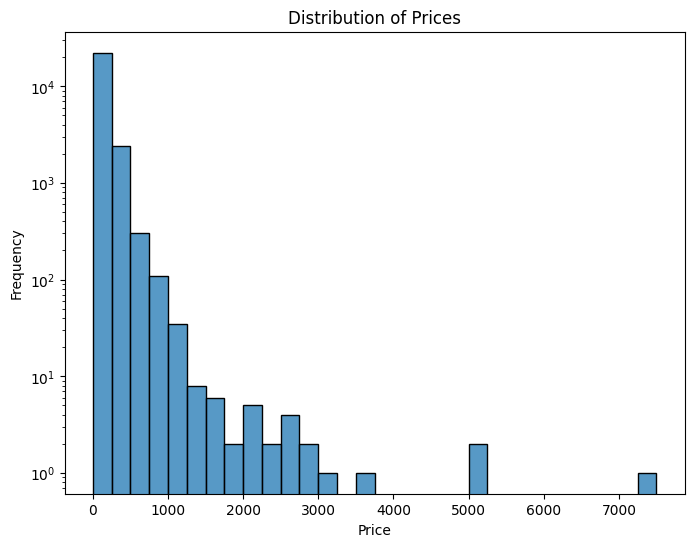

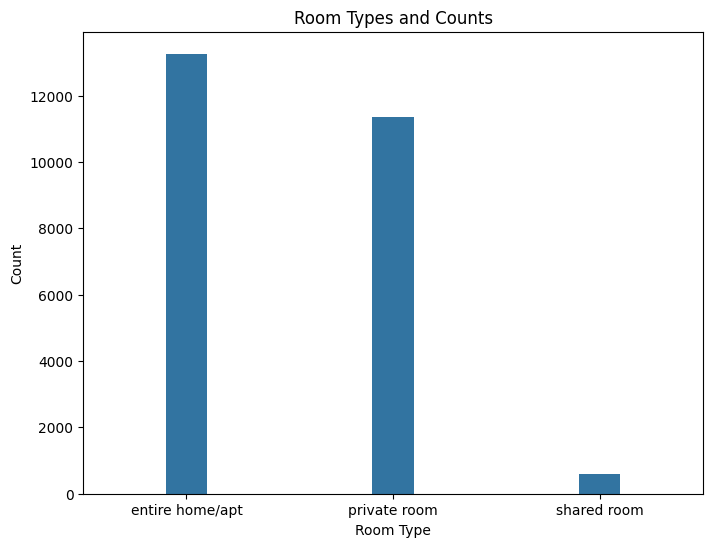

In [23]:
# Distribution plot of prices
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['price'], bins=30)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

# Plot depicting room types and their counts
plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=merged_df, width=0.2)
plt.title('Room Types and Counts')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()